# Sequential Parameter Optimization
## `river` Hyperparameter Tuning: Nowcasting


# Example: Nowcasting Hyperparameter

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import statistics
from math import inf
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
from matplotlib import pyplot
import matplotlib.pyplot as plt
from river import anomaly
from river import compose
from river import preprocessing
from river import linear_model
from river import datasets
from river import metrics
from river import time_series
from river import utils
from spotRiver.fun.hyperriver import HyperRiver
from spotPython.spot import spot

## 1 Nowcasting Example from River (Airline Passengers)

* This is the Nowcasting example taken from [https://riverml.xyz/0.15.0/examples/building-a-simple-nowcasting-model/](https://riverml.xyz/0.15.0/examples/building-a-simple-nowcasting-model/)
* It is used to check whether the implementation can be executed.
* Finally, the objective function is added.

In [2]:
from river import compose
from river import linear_model
from river import preprocessing, datasets, utils, metrics
import matplotlib.pyplot as plt
from spotRiver.utils.features import get_ordinal_date
from spotRiver.evaluation.eval_nowcast import eval_nowcast_model, plot_nowcast_model

dataset = datasets.AirlinePassengers()
for x, y in datasets.AirlinePassengers():
    print(x, y)
    break


{'month': datetime.datetime(1949, 1, 1, 0, 0)} 112


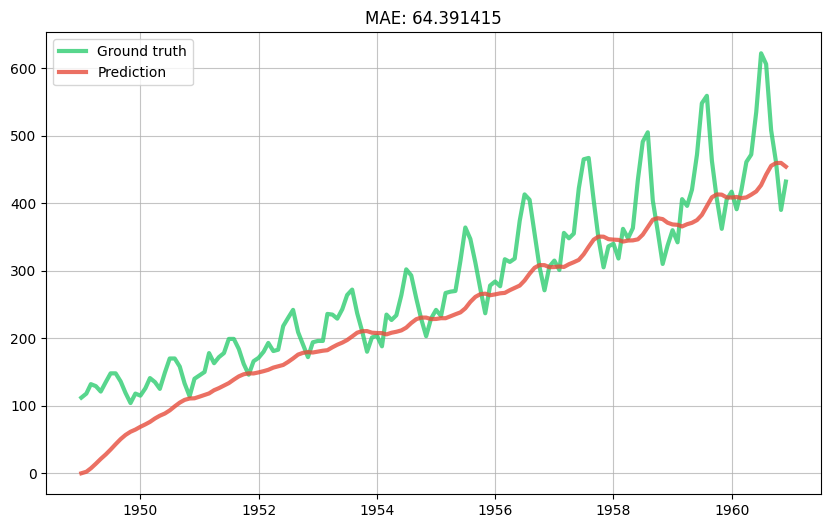

In [3]:


model = compose.Pipeline(
    ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression())
)

dates, metric, y_trues, y_preds = eval_nowcast_model(model, dataset=dataset)
plot_nowcast_model(dates, metric, y_trues, y_preds)

## 2 Nowcasting: The Improved Model for Airline Passengers

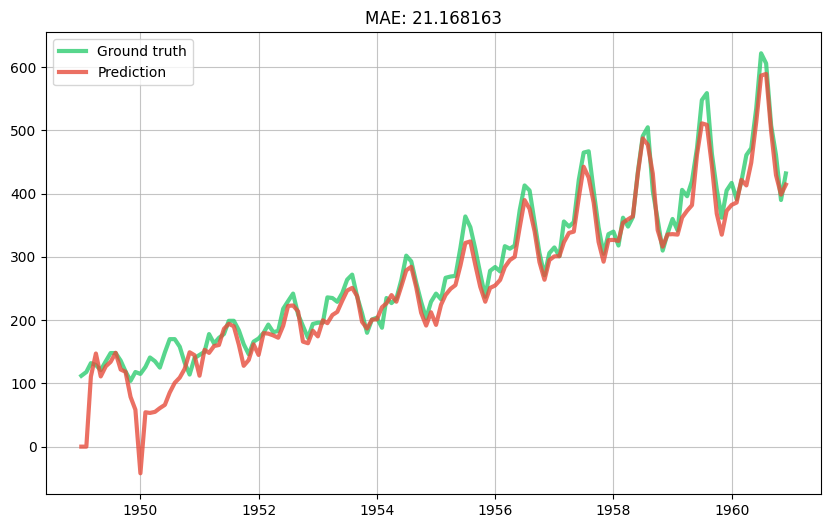

In [4]:
from river import compose
from river import linear_model
from river import preprocessing, datasets, utils, metrics
import matplotlib.pyplot as plt
from spotRiver.utils.features import get_month_distances
from spotRiver.evaluation.eval_nowcast import eval_nowcast_model, plot_nowcast_model
from river import optim

dataset = datasets.AirlinePassengers()

model = compose.Pipeline(
    ('features', compose.TransformerUnion(
        ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
        ('month_distances', compose.FuncTransformer(get_month_distances)),
    )),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(
        intercept_lr=0,
        optimizer=optim.SGD(0.03)
    ))
)

dates, metric, y_trues, y_preds = eval_nowcast_model(model, dataset=dataset)

plot_nowcast_model(dates, metric, y_trues, y_preds)

## 3 Nowcasting: The Improved Model for GW Data

In [5]:
from river import compose
from river import linear_model
from river import preprocessing, datasets, utils, metrics
import matplotlib.pyplot as plt
from spotRiver.utils.features import get_month_distances, get_weekday_distances, get_ordinal_date, get_hour_distances
from spotRiver.evaluation.eval_nowcast import eval_nowcast_model, plot_nowcast_model
from river import optim
from spotRiver.data.generic import GenericData
dataset = GenericData(filename="UnivariateData.csv",
                      directory="/Users/bartz/data/",
                      target="Consumption",
                      n_features=1,
                      n_samples=51_706,
                      converters={"Consumption": float},
                      parse_dates={"Time": "%Y-%m-%d %H:%M:%S%z"})
for x, y in dataset:
    print(x, y)
    break


{'Time': datetime.datetime(2016, 12, 31, 23, 0, tzinfo=datetime.timezone.utc)} 10951.217


In [6]:
model = compose.Pipeline(
    ('features', compose.TransformerUnion(
        ('ordinal_date', compose.FuncTransformer(get_ordinal_date)),
        ('month_distances', compose.FuncTransformer(get_month_distances)),
        ('weekday_distances', compose.FuncTransformer(get_weekday_distances)),
        ('hour_distances', compose.FuncTransformer(get_hour_distances)),
    )),
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(
        intercept_lr=0,
        optimizer=optim.SGD(0.001)
    ))
)
# model = preprocessing.TargetStandardScaler(regressor=model)

In [7]:
dates, metric, y_trues, y_preds = eval_nowcast_model(model, dataset=dataset, time_interval="Time")

In [8]:
metric.get()

528.0815974501623

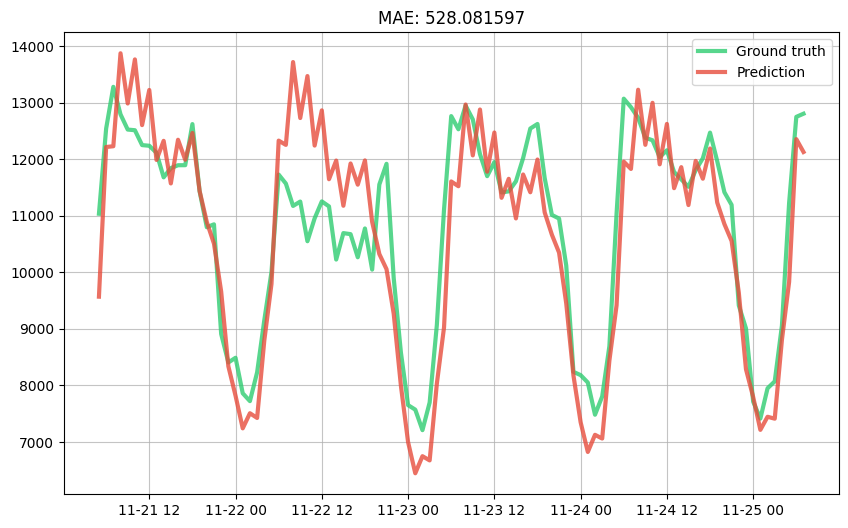

In [9]:
plot_nowcast_model(dates, metric, y_trues, y_preds, range=[51_606, -1])

In [10]:
model['lin_reg'].weights
# model.regressor['lin_reg'].weights

{'0': -235.6662256737642,
 '1': -333.8597767121011,
 '2': -166.60515703142843,
 '3': -398.3164293251247,
 '4': 50.275551339092694,
 '5': -169.45142344007323,
 '6': 638.4742473476564,
 '7': 37.6264293267736,
 '8': 751.4007307065327,
 '9': 76.61402576145916,
 '10': 697.4350413788226,
 '11': 50.55007913734054,
 '12': 641.3874486220295,
 '13': 43.77981574754521,
 '14': 485.6937415688491,
 '15': 37.47450513991453,
 '16': 478.97905413868006,
 '17': 137.17696596351325,
 '18': 498.6254263427514,
 '19': 146.6910401192886,
 '20': 200.83410007951358,
 '21': 141.2855567496849,
 '22': 84.9211151091921,
 '23': -273.958250199456,
 'Monday': 403.9242319764748,
 'Tuesday': 308.05998718632344,
 'Wednesday': 266.0574499974242,
 'Thursday': 247.53953828088515,
 'Friday': 223.1605497202395,
 'Saturday': 329.4793408544685,
 'Sunday': 326.51905806295923,
 'January': 216.0245684834677,
 'February': 151.685182458356,
 'March': 161.99846824879307,
 'April': 166.13564738444413,
 'May': 376.51591777908425,
 'June

# 4 SPOT Hyperparameter

In [11]:
import numpy as np
from math import inf
from river import compose
from river import linear_model
from river import preprocessing, datasets, utils, metrics
import matplotlib.pyplot as plt
from spotRiver.utils.features import get_month_distances, get_weekday_distances, get_ordinal_date, get_hour_distances
from spotRiver.evaluation.eval_nowcast import eval_nowcast_model, plot_nowcast_model
from river import optim
from scipy.optimize import differential_evolution
from spotRiver.data.generic import GenericData
from spotRiver.fun.hyperriver import HyperRiver
from spotPython.spot import spot


dataset = GenericData(filename="UnivariateData.csv",
                      directory="/Users/bartz/data/",
                      target="Consumption",
                      n_features=1,
                      n_samples=51_706,
                      converters={"Consumption": float},
                      parse_dates={"Time": "%Y-%m-%d %H:%M:%S%z"})

fun = HyperRiver(123).fun_nowcasting
var_name = ["lr", "intercept_lr", "hour", "weekday", "month"]
var_type = ["num", "num"] + ["factor"] * 3
lower = np.array([0.00225, 0.01,        0,      0,   0])
upper = np.array([0.003,  0.09,       1,      1,   1])
fun_control = {"data": dataset}

In [12]:
spot_now = spot.Spot(fun=fun,
                   lower = lower,
                   upper = upper,
                   fun_evals = inf,
                   fun_repeats = 1,
                   max_time = 360,
                   noise = False,
                   tolerance_x = np.sqrt(np.spacing(1)),
                   var_type=var_type,
                   var_name=var_name,
                   infill_criterion = "y",
                   n_points = 1,
                   seed=123,
                   log_level = 50,
                   show_models= False,
                   show_progress= True,
                   fun_control = fun_control,
                   design_control={"init_size": 20,
                                   "repeats": 1},
                   surrogate_control={"noise": True,
                                      "cod_type": "norm",
                                      "min_theta": -4,
                                      "max_theta": 3,
                                      "n_theta": 5,
                                      "model_optimizer": differential_evolution,
                                      "model_fun_evals": 1000,
                                      "log_level": 50
                                      })
spot_now.run()

spotPython tuning: [##########] 100.00% Done...


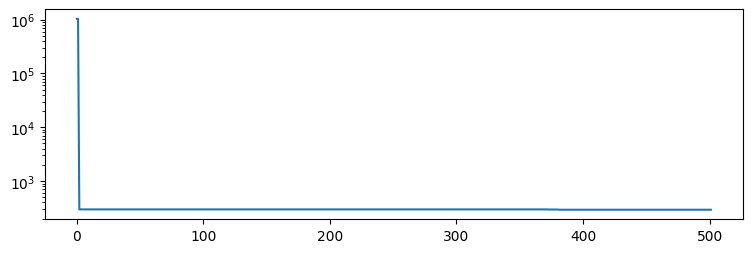

In [13]:
spot_now.plot_progress(log_y=True)

In [14]:
spot_now.print_results()

min y: 293.0915027569137
lr: 0.003
intercept_lr: 0.027288127782498565
hour: 1.0
weekday: 0.0
month: 0.0


In [15]:
spot_now.print_importance()

Importance relative to the most important parameter:
lr:  0.15982910815634357
intercept_lr:  100.0
hour:  11.885062455717764
weekday:  26.86539030174958
month:  27.78280130575712


In [16]:
X = spot_now.to_all_dim(spot_now.min_X.reshape(1,-1))
print(X)
lr = X[:, 0]
intercept_lr = X[:, 1]
hour = X[:, 2]
weekday = X[:, 3]
month = X[:, 4]

[[0.003      0.02728813 1.         0.         0.        ]]


In [17]:
h_i = int(hour)
w_i = int(weekday)
m_i = int(month)
# baseline:
extract_features = compose.TransformerUnion(get_ordinal_date)
if h_i:
    extract_features = compose.TransformerUnion(get_ordinal_date, get_hour_distances)
if w_i:
    extract_features = compose.TransformerUnion(extract_features, get_weekday_distances)
if m_i:
    extract_features = compose.TransformerUnion(extract_features, get_month_distances)
model_spot = compose.Pipeline(
    ("features", extract_features),
    ("scale", preprocessing.StandardScaler()),
    (
        "lin_reg",
        linear_model.LinearRegression(
            intercept_init=0, optimizer=optim.SGD(float(lr)), intercept_lr=float(intercept_lr)
        ),
    ),
)
# eval:
dates, metric, y_trues, y_preds = eval_nowcast_model(
    model_spot, dataset=dataset, time_interval="Time"
)
z = metric.get()
z

293.0915027569137

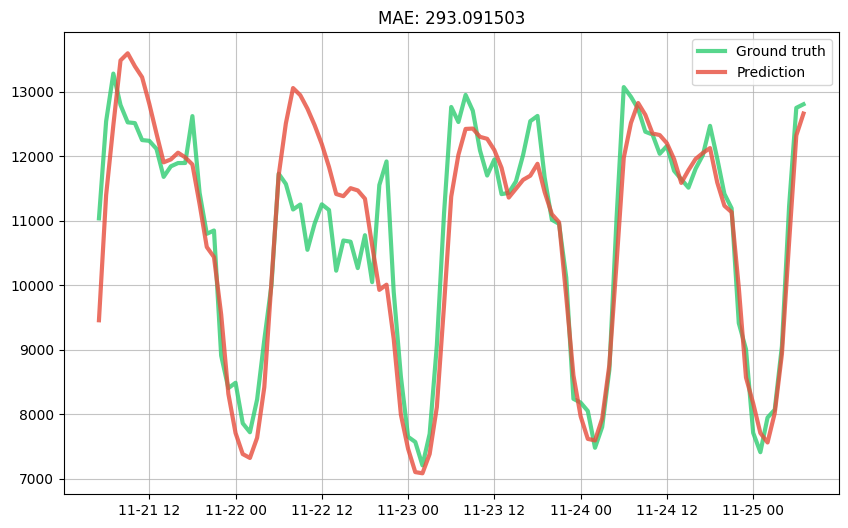

In [18]:
plot_nowcast_model(dates, metric, y_trues, y_preds, range=[51_606, -1])

In [19]:
model_spot['lin_reg'].weights

{'0': -110.70082168043797,
 '1': -144.105535653193,
 '2': -164.4291464240334,
 '3': -108.42004847722016,
 '4': -16.86396957330447,
 '5': 236.25621696753228,
 '6': 510.67123425322984,
 '7': 434.1940280895877,
 '8': 510.7530903232696,
 '9': 453.17095614335005,
 '10': 412.20237056234635,
 '11': 422.9764747380845,
 '12': 410.74666018355845,
 '13': 392.70652657074817,
 '14': 302.31388432077694,
 '15': 358.4750923184161,
 '16': 390.0677376356161,
 '17': 383.9192648498136,
 '18': 464.1984102579565,
 '19': 335.51453118213345,
 '20': 264.82353451298616,
 '21': 333.7582768314562,
 '22': 136.68276326050267,
 '23': -95.51526565790478,
 'ordinal_date': 819.9310164418388}

In [20]:
min_z = None
max_z = None


* For productive use, you might want to select:
  * `min_z=min(spot_now.y)` and
  * `max_z = max(spot_now.y)`
* These settings are not so colorful, but give better insights.

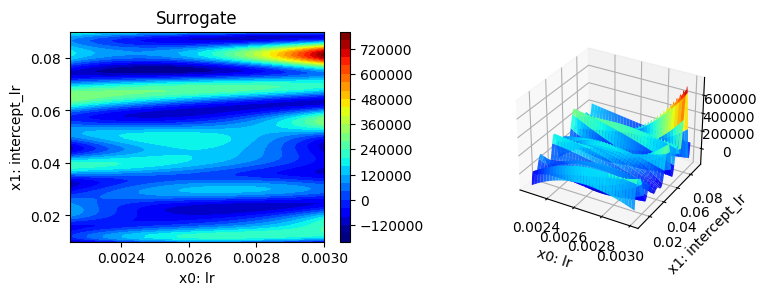

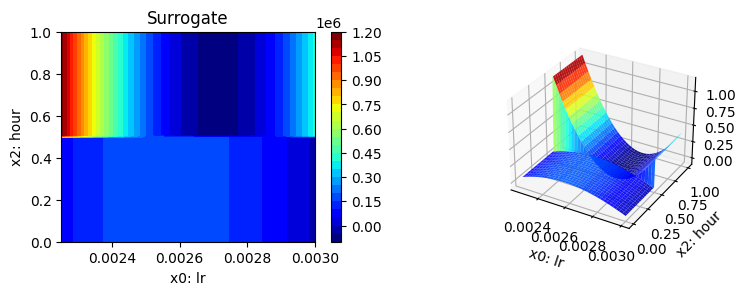

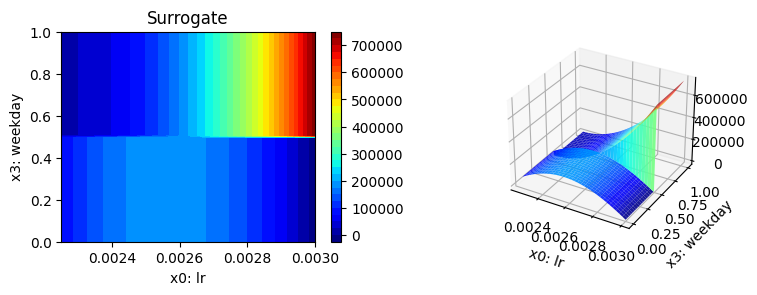

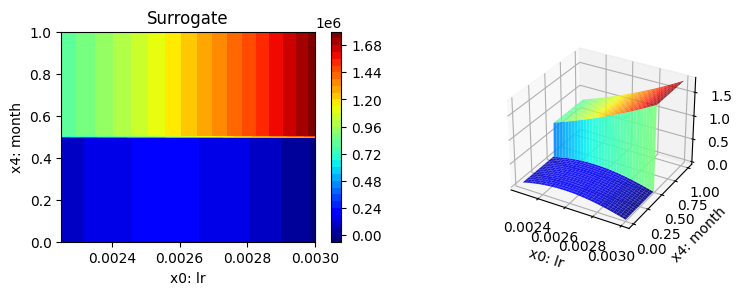

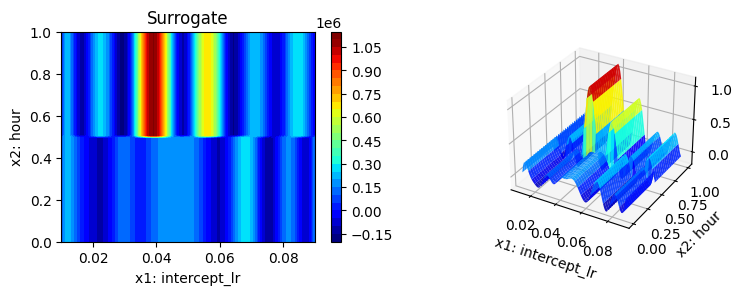

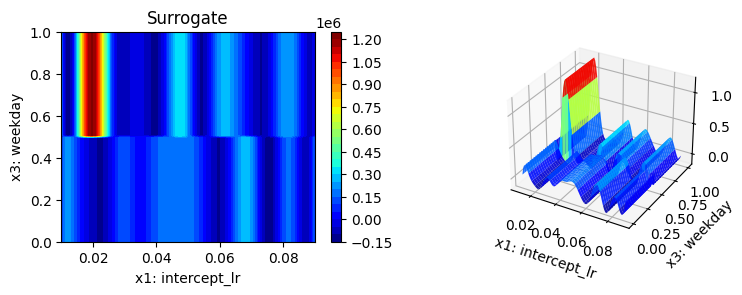

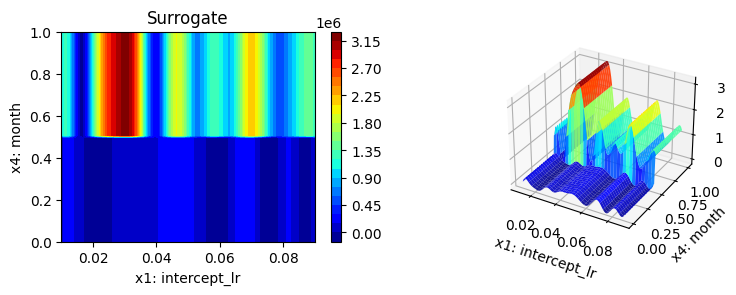

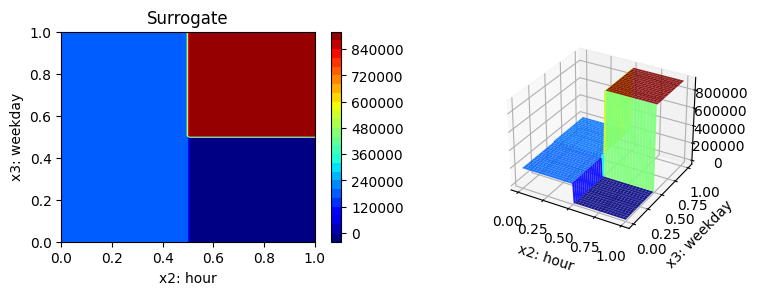

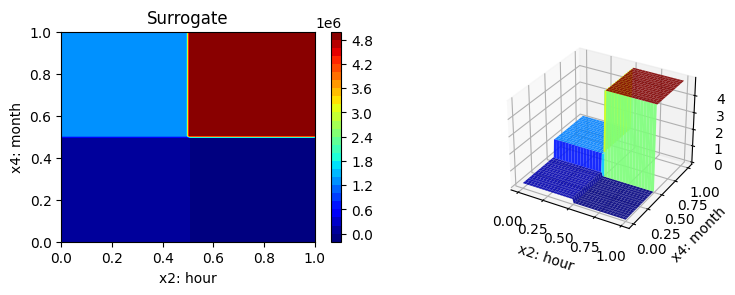

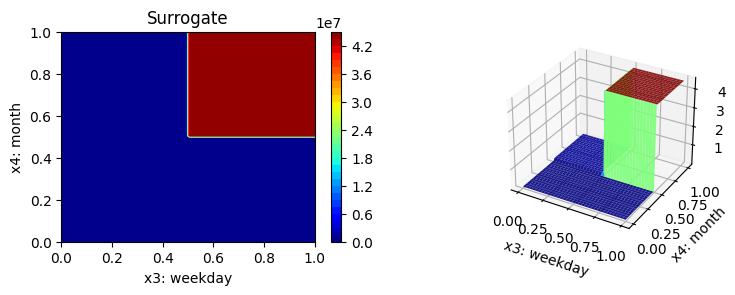

In [21]:
min(spot_now.y), max(spot_now.y)
n = spot_now.k
for i in range(n-1):
    for j in range(i+1, n):
        spot_now.plot_contour(i=i, j=j, min_z=min_z, max_z = max_z)